# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
from sklearn.cluster import KMeans
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [2]:
A = imread("img_exo/fille.jpg")

In [3]:
A

array([[[246, 242, 241],
        [246, 242, 241],
        [246, 242, 241],
        ...,
        [246, 242, 241],
        [246, 242, 241],
        [246, 242, 241]],

       [[246, 242, 241],
        [246, 242, 241],
        [246, 242, 241],
        ...,
        [246, 242, 241],
        [246, 242, 241],
        [246, 242, 241]],

       [[246, 242, 241],
        [246, 242, 241],
        [246, 242, 241],
        ...,
        [246, 242, 241],
        [246, 242, 241],
        [246, 242, 241]],

       ...,

       [[137, 102,  74],
        [127,  92,  64],
        [120,  85,  57],
        ...,
        [202, 169, 152],
        [201, 168, 151],
        [203, 167, 151]],

       [[135, 100,  72],
        [125,  90,  62],
        [120,  85,  57],
        ...,
        [203, 170, 153],
        [203, 170, 153],
        [204, 168, 152]],

       [[131,  96,  68],
        [124,  89,  61],
        [122,  87,  59],
        ...,
        [205, 172, 155],
        [204, 171, 154],
        [204, 171, 154]]

In [4]:
B = imread("img_exo/soleil.jpg")

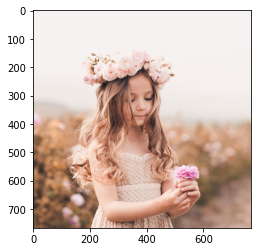

In [5]:
plt.imshow(imread("img_exo/fille.jpg"))

Muestra la imagen para ver que se ha cargado bien

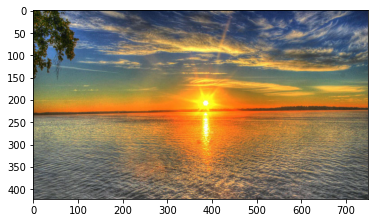

In [6]:
plt.imshow(imread("img_exo/soleil.jpg"))

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [7]:
A.shape

(767, 767, 3)

In [8]:
A_trans = A.reshape(767*767,3)

In [9]:
A_trans.shape

(588289, 3)

In [10]:
B.shape

(422, 750, 3)

In [11]:
B_trans = B.reshape(422*750,3)
B_trans.shape

(316500, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [12]:
X = A_trans

k = 3
kmeans = KMeans(n_clusters=k, random_state=101)
y_pred = kmeans.fit_predict(X)

#mapping = np.array([1, 0, 2])
#y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

In [13]:
kmeans.cluster_centers_

array([[242.95793092, 233.60427201, 229.72143867],
       [136.95195216,  96.11620837,  74.87167027],
       [209.15746803, 162.68982312, 140.20462056]])

In [14]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [15]:
new_image=[]
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        new_image.append(kmeans.cluster_centers_[0])
    elif kmeans.labels_[i] == 1:
        new_image.append(kmeans.cluster_centers_[1])
    else:
        new_image.append(kmeans.cluster_centers_[2])

In [16]:
new_image_array = np.array(new_image)

In [17]:
NEW = new_image_array.reshape(767,767,3)

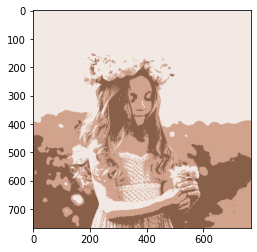

In [18]:
plt.imshow(NEW.astype('uint8'))

### 2nd image

In [19]:
X = B_trans

k = 3
kmeans = KMeans(n_clusters=k, random_state=101)
y_pred = kmeans.fit_predict(X)

mapping = np.array([1, 0, 2])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

In [20]:
kmeans.cluster_centers_

array([[ 77.45715339,  84.70568304,  91.32883302],
       [220.38790092, 143.90201209,  49.44740023],
       [140.74564567, 129.29664459, 102.15154729]])

In [21]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

con loop

In [22]:
new_image=[]
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        new_image.append(kmeans.cluster_centers_[0])
    elif kmeans.labels_[i] == 1:
        new_image.append(kmeans.cluster_centers_[1])
    else:
        new_image.append(kmeans.cluster_centers_[2])

In [23]:
new_image_array = np.array(new_image)

In [24]:
NEW3 = new_image_array.reshape(422,750,3)

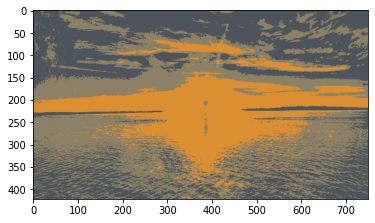

In [25]:
plt.imshow(NEW3.astype('uint8'))

directly

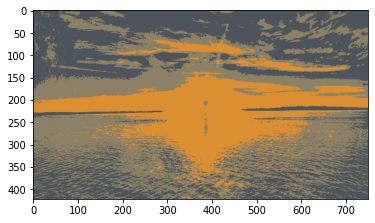

In [26]:
NEW2 = kmeans.cluster_centers_[kmeans.labels_]
NEW2 = NEW2.reshape(422, 750, 3)
plt.imshow(NEW2.astype('uint8'))
plt.savefig('my_image')

# RESUMEN DU PRECEDENT

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [27]:
new_img = kmeans.cluster_centers_[kmeans.labels_]

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [28]:
new_img = new_img.reshape(422, 750, 3)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

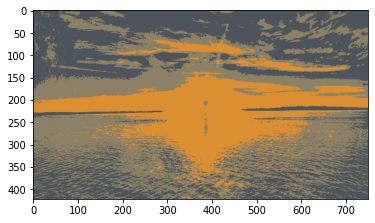

In [29]:
plt.imshow(new_img.astype('uint8'))

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [30]:
def image_split(imagen, k, ext):
    
    A = imread(imagen)
    A_trans = A.reshape(A.shape[0]*A.shape[1],A.shape[2])
    kmeans = KMeans(n_clusters=k, random_state=101)
    y_pred = kmeans.fit_predict(A_trans)
    new_A = kmeans.cluster_centers_[kmeans.labels_]
    new_A = new_A.reshape(A.shape[0], A.shape[1], A.shape[2])
    if ext == 'jpg':
        plt.imshow(new_A.astype('uint8'))
    elif ext == 'png':
        plt.imshow(new_A)

In [31]:
#img_vect = img.reshape(-1,3)
A.shape
A.reshape(-1,3)

array([[246, 242, 241],
       [246, 242, 241],
       [246, 242, 241],
       ...,
       [205, 172, 155],
       [204, 171, 154],
       [204, 171, 154]], dtype=uint8)

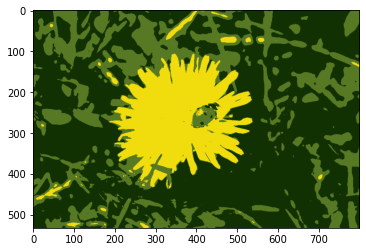

In [32]:
image_split('ladybug.png', 3, 'png')

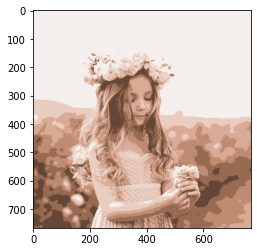

In [33]:
image_split('img_exo/fille.jpg', 6, 'jpg')

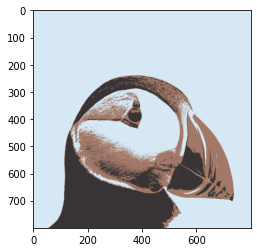

In [34]:
image_split('slider.jpg', 3, 'jpg')

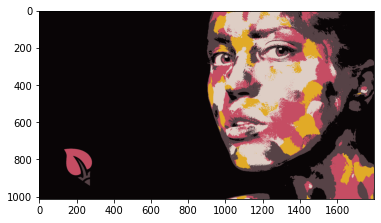

In [35]:
image_split('couleur.jpg', 5, 'jpg')

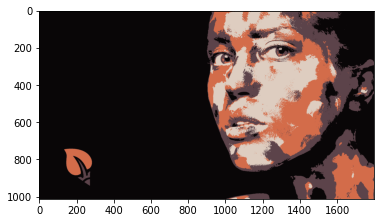

In [36]:
image_split('couleur.jpg', 4, 'jpg')

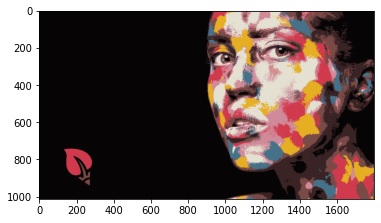

In [37]:
image_split('couleur.jpg', 8, 'jpg')